In [99]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16
from keras.preprocessing import image
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import tensorflow as tf

In [151]:
# Importaciones necesarias
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator

# creo la variable TRAIN_PATH con la ruta del directorio que contiene los datos de entrenamiento
TRAIN_PATH = '../Proyecto Mlearning/DataSet/Training'

# ImageDataGenerator con los parámetros de data augmentation para el entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # porcentaje para validación ----> dejo el 20%
)

# Crear un ImageDataGenerator para la validación
validation_datagen = ImageDataGenerator(
    rescale=1.0/255.,
    validation_split=0.2  # Especificar el mismo porcentaje que para el entrenamiento
)

# generador de datos de entrenamiento
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(100, 100),
    batch_size=64,
    class_mode='categorical',
    subset='training', 
    seed=123
)

# Crear el generador de datos de validación
validation_generator = validation_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(100, 100),
    batch_size=64,
    class_mode='categorical',
    subset='validation',  # Especificar el subset de validación
    seed=123
)

# Construcción del modelo 
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    # no agregar mas capas convolucionales y de pooling //  solo si es necesario --> modelo mas bueno
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),  # Regularización L2
    Dropout(0.5),  # Capa de Dropout
    Dense(4, activation='softmax')
])

# Compilación del modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenamiento del modelo
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_steps=validation_generator.n // validation_generator.batch_size
)



Found 4162 images belonging to 4 classes.
Found 1039 images belonging to 4 classes.
Epoch 1/20
65/65 [==============================] - 17s 256ms/step - loss: 1.5084 - accuracy: 0.6591 - val_loss: 0.6677 - val_accuracy: 0.7832
Epoch 2/20
65/65 [==============================] - 15s 235ms/step - loss: 0.5261 - accuracy: 0.8719 - val_loss: 0.3975 - val_accuracy: 0.9971
Epoch 3/20
65/65 [==============================] - 15s 231ms/step - loss: 0.3956 - accuracy: 0.9175 - val_loss: 0.3099 - val_accuracy: 0.9961
Epoch 4/20
65/65 [==============================] - 16s 239ms/step - loss: 0.3475 - accuracy: 0.9265 - val_loss: 0.2490 - val_accuracy: 0.9756
Epoch 5/20
65/65 [==============================] - 15s 228ms/step - loss: 0.2889 - accuracy: 0.9388 - val_loss: 0.2965 - val_accuracy: 0.9561
Epoch 6/20
65/65 [==============================] - 15s 229ms/step - loss: 0.2579 - accuracy: 0.9490 - val_loss: 0.1752 - val_accuracy: 0.9971
Epoch 7/20
65/65 [==============================] - 15s 22

In [152]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_11 (Flatten)        (None, 76832)             0         
                                                                 
 dense_22 (Dense)            (None, 128)               9834624   
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 4)                 516       
                                                     

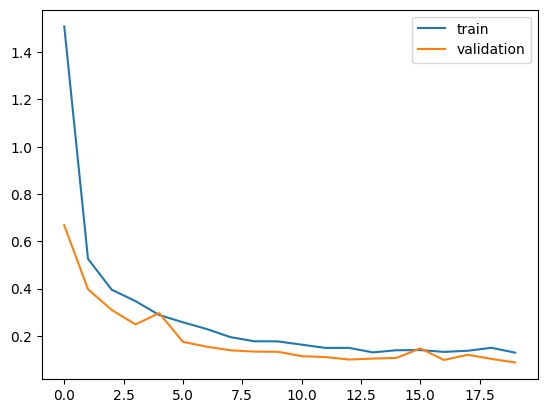

In [153]:
# graficar modelo
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [158]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Cargar la imagen de prueba
img_path = 'DataSet/TetsY/naranja.jpg'  # Reemplaza con la ruta de tu imagen de prueba
img = image.load_img(img_path, target_size=(100, 100))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalizar los valores de píxeles al rango [0, 1]

# Realizar la predicción
predictions = model.predict(img_array)

# Obtener la clase predicha
predicted_class = np.argmax(predictions)

confidence = predictions[0, predicted_class]

# Definir un umbral de confianza
umbral_confianza = 0.74

# Verificar si la confianza supera el umbral
if confidence >= umbral_confianza:
    # Imprimir el resultado si la confianza es suficiente
    classes = ['limones', 'mandarinas', 'pomelos', 'naranjas']
    print(f"Clase predicha: {classes[predicted_class]} con confianza: {confidence:.2%}")
else:
    # Imprimir un mensaje si la confianza es insuficiente
    print("No estoy seguro de qué clase es esta imagen.")

1/1 [==============================] - 0s 32ms/step
Clase predicha: naranjas con confianza: 97.29%


In [142]:
predictions



array([[1.4290241e-04, 3.2309623e-04, 9.9953389e-01, 1.6795829e-07]],
      dtype=float32)

In [150]:
# Accedes a los datos de precisión
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Imprimes la precisión para cada época
print("Precisión en entrenamiento por época:")
for i, acc in enumerate(train_accuracy):
    print(f"Época {i+1}: {acc}")

print("\nPrecisión en validación por época:")
for i, acc in enumerate(validation_accuracy):
    print(f"Época {i+1}: {acc}")

Precisión en entrenamiento por época:
Época 1: 0.6640663146972656
Época 2: 0.8105801939964294
Época 3: 0.861774742603302
Época 4: 0.8871282339096069
Época 5: 0.8966357707977295
Época 6: 0.8951730728149414
Época 7: 0.9019989967346191
Época 8: 0.9132130742073059
Época 9: 0.9229643940925598
Época 10: 0.919551432132721
Época 11: 0.9278846383094788
Época 12: 0.9293027520179749
Época 13: 0.9305216670036316
Época 14: 0.935153603553772
Época 15: 0.9275962710380554

Precisión en validación por época:
Época 1: 0.650390625
Época 2: 0.8056640625
Época 3: 0.998046875
Época 4: 0.99609375
Época 5: 0.998046875
Época 6: 0.998046875
Época 7: 0.998046875
Época 8: 0.99609375
Época 9: 0.998046875
Época 10: 0.99609375
Época 11: 0.98046875
Época 12: 0.9970703125
Época 13: 0.9892578125
Época 14: 0.9970703125
Época 15: 0.9970703125
